# Outils bayésiens en traitement d'image
##   TP 1 : Le cas indépendant

Dans ce TP, les objectifs sont de :
1. Se (re)familiariser avec les outils de base en Python
2. Réaliser des segmentation supervisées d'image dans le cas le plus simple
3. Faire l'estimation des paramètres pour réaliser des segmentations non supervisées.
4. Reproduire ces résultats de manière robuste en variant les conditions expérimentales.

## 1. Introduction et outils de base

Nous commençons par importer les librairies adéquates, et fixer quelques choix d'affichage.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# paramètres matplotlib à fixer une fois pour toute
plt.rcParams['image.cmap'] = 'cividis'          # choix de colormap
plt.rcParams['image.interpolation'] = 'nearest'  # pas d'interpolation pour l'affichage
plt.rcParams['image.origin'] = 'lower'           # origine en bas à gauche

np.set_printoptions(precision=3, suppress=False) # affichage à précision limitée

Commençons par charger une image et l'afficher :

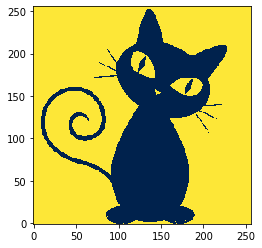

In [2]:
X = plt.imread('cat.png') # changer le chemin si nécessaire
plt.imshow(X);

Nous allons simuler une réalisation de $\mathbf{y} \sim p(\mathbf{y}|\mathbf{X}=\mathbf{x})$.
Pour cela, il est nécessaire de connaître les paramètres du modèle $\mathbf{\Theta}$.

Nous les représentons à l'aide d'une classe `Param_id` qui contient les valeurs numériques ainsi que quelques fonctions utiles.

In [3]:
class Param_id:
    """Classe représentant les paramètres du modèle indépendant"""
    
    def __init__(self):
        """Constructeur : valeurs initiales."""
        self.pi = np.array([0.305,0.695])
        self.sig = np.array([0.25,0.25])
        self.m = np.array([0.,1.])

    def print(self):
        """Affichage en une ligne des valeurs de Theta."""
        print("Theta : m = ", self.m, "\t| sig = ",self.sig,"\t| pi =", self.pi,"")
        
    def set_random(self):
        """Choix au hasard de valeurs pour Theta."""
        self.m[0] = np.random.rand()
        self.m[1] = np.random.rand()+1
        self.sig[0] = np.random.rand()
        self.sig[1] = np.random.rand()
        self.pi[0] = np.random.rand()
        self.pi[1] = 1-self.pi[0]
        
    def toarray(self):
        """Retourne les valeurs de Theta sous la forme d'un tableau."""
        return np.array([self.m[0],self.m[1],self.sig[0],self.sig[1],self.pi[0],self.pi[1]])
    
    def fromarray(self,array):
        """Attribue des valeurs dans Theta à partir d'un tableau."""
        self.m[0],self.m[1],self.sig[0],self.sig[1],self.pi[0],self.pi[1] = array

Ainsi, nous pouvons créer un objet `Theta_reel` pour simuler une image $\mathbf{Y}$.

In [4]:
Theta_reel = Param_id()
Theta_reel.print()

print(Theta_reel.m[0], Theta_reel.sig[1])

Theta : m =  [0. 1.] 	| sig =  [0.25 0.25] 	| pi = [0.305 0.695] 
0.0 0.25


<font color='orange' size = 4>**Question 1.**</font>

Simuler une réalisation de $\mathbf{Y}$ conditionnellement à $\mathbf{X} = \mathbf{x}$ et l'afficher.

On pourra grouper le code de simulation dans une fonction `simule_Y_cond_X(X,Theta)` qui sera utilisée ensuite.

## 2. Segmentation supervisée.
Dans cette partie, on considère $\mathbf{y}$ fixé, et l'objectif est de retrouver le  $\mathbf{x}$ d'origine.

<font color='orange' size = 4>**Question 2.**</font>

Calculer pour chaque classe $\omega_k$, et chaque site $s$ les probabilités a posteriori $p(x_s = \omega_k | \mathbf{y})$.

Le résultat pourra prendre la forme d'un tableau `proba_post` de taille $2 \times P \times Q$ où $P$ et $Q$ sont les dimensions de l'image. Aficher le tableau et vérifier la cohérence des résultats.

On pourra rassembler les calcul dans une fonction `calc_probapost(Y,Theta)`.

<font color='orange' size = 4>**Question 3.**</font>

Utiliser ces probabilités a posteriori pour estimer la segmentation $\hat{\mathbf{x}}$. Afficher le résultat, et calculer le taux d'erreur de segmentation associé.

Une fois le code fonctionnel, on pourra regrouper les opérations des questions 2 et 3 dans une fonction `calc_Xpost_id(Y,Theta)` qui estime  $\hat{\mathbf{x}}$ à partir de $\mathbf{y}$ et $\mathbf{\Theta}$.

Vous pouvez également créer une fonction `calcul_erreur(X1,X2)` qui vous donne le taux d'erreur de segmentation ; elle vous sera utile tout au long des TP.

## 3. Segmentation non supervisée

### 3.1 Algorithme SEM 

<font color='orange' size = 4>**Question 4.**</font>

Écrire les fonctions nécessaire à l'estimation des paramètres avec les "données complètes" $(\mathbf{x}, \mathbf{y})$.
On les notera : 

  - `est_m` pour les estimateurs des moyennes
  - `est_sig` pour les écarts-types
  - `est_pi` pour les proportions
    
Ensuite, créer une fonction `est_Theta(x,y)` qui retourne l'ensemble des paramètres stockés dans une variable `Theta` de la classe `Param_id`. 

Vous pouvez vérifier le bon fonctionnement de chaque fonction à l'aide des $\mathbf{x}$ et $\mathbf{y}$ utilisés précédemment.

<font color='orange' size = 4>**Question 5.**</font>

Implémenter l'algorithme SEM. Il est suggéré de suivre les étapes suivantes :

1. Initialiser simplement en prenant un estimateur naïf de $\mathbf{x}$
2. Fixer un grand nombre d'itération ( $> 100$ au moins)
3. Vérifier que la valeur finale de `Theta_SEM` est raisonnable par rapport à `Theta_reel` défini plus haut.

Ensuite, nous pouvons être plus précis algorithmiquement :

4. Stocker chaque valeur de $\mathbf{\Theta}^{(q)}$ dans une ligne d'un tableau `theta_series` de taille $6 \times$ nb. iteration
5. Afficher toutes les valeurs prises par les paramètres en affichant 6 graphes d'évolution des valeurs en fonction du nméro d'itération.
6. Prendre comme valeur finale de `Theta_SEM` la moyenne des dernières valeurs.


<font color='orange' size = 4>**Question 6.**</font>

Finalement, procéder à la segmentation non supervisée en utilisant les paramètres `Theta_SEM`, et calculer le taux d'erreur de segmentation. Commenter le résultat par rapport au cas supervisé.

L'ensemble (SEM, et estimation du $\mathbf{x}$ associé) pourra être regroupé dans une fonction `segmentation_ID_SEM(y)` qui nous servira dans la suite du TP et dans les suivants.

## 3.2. Algorithme EM

L'algorithmes SEM est relativement simple à implémenter, mais reste stochastique. Dans cette partie on recherche à implémenter l'algorithme EM comme alternative.

<font color='orange' size = 4>**Question 7.**</font>

De la même manière que dans la question 4, nous commençons par l'estimation des paramètres à partir de données "complètes" $(\mathbf{x}, \mathbf{y})$.

Attention, nous utilisons ici des estimateurs pondérés, différents de ceux de la question 4 : il faut faire intervenir les probabilités à posteriori $p(x_s = \omega_k | \mathbf{y})$, stockées dans le tableau `proba_post` (plus d'information dans le cours).

On les notera : 

  - `est_m_pondere` pour les estimateurs des moyennes
  - `est_sig_pondere` pour les écarts-types
  - `est_pi_pondere` pour les proportions
    
Ensuite, créer une fonction `est_Theta_pondere(proba_post,y)` qui rassemble ces trois estimateurs.

<font color='orange' size = 4>**Question 8.**</font>

Implémenter ensuite l'algorithme EM en suivant la même démarche que celle adoptée en question 5 pour SEM.

Différence notable : le résultat de EM (stocké dans `Theta_EM` pour la suite) est la dernière valeure prise par $\mathbf{Theta}$ car l'algorithme est déterministe.

<font color='orange' size = 4>**Question 9.**</font>

Réaliser la segmentation non supervisée avec `Theta_EM`, et la comparer avec les précédents résultats.

L'ensemble (EM, et estimation du $\mathbf{x}$ associé) pourra là aussi être regroupé dans une fonction `segmentation_ID_EM(y)` qui nous servira ensuite.

# 4. Variations expérimentales

Jusqu'ici, nous n'avons traité qu'une image pour valider la segmentation supervisée et non supervisée.
Pour établir un résultat scientifiquement représentatif, il faut répéter les expériences afin d'obtenir des résultats moyens.
Il

<font color='orange' size = 4>**Question 10.**</font>

En gardant la même valeur pour `Theta_reel`, répéter 50 expériences (simulations de $\mathbf{Y}=\mathbf{y}$, segmentation non supervisée, calcul de l'erreur) pour obtenir une erreur moyenne de segmentation dans les cas :
- supervisé,
- non supervisé avec SEM,
- non supervisé avec EM.

Commenter les résultats.

Remarque : calculer 50 répétitions prends du temps, vous pouvez commencer avec une plus petite valeur pour valider votre code.

<font color='orange' size = 4>**Question 11.**</font>

On souhaite maintenant faire varier l'écart-type du bruit $\sigma$ en gardant les autres paramètres fixes. 
Reproduire l'expérience de la question précédente en faisant varier $\sigma$, et en gardant 100 réalisations différentes de $\mathbf{Y}=\mathbf{y}$ pour chaque valeur de $\sigma$.
Afficher le résultat, commenter, et conclure sur les éléments vus dans ce TD.